# Neural Network Chatbot

In [156]:
import nltk
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import json
import pickle
import numpy as np
from tensorflow.keras import layers
from tensorflow import keras
import random
from keras import Sequential
import tensorflow as tf
import torch
from torch import nn
import matplotlib.pyplot as plt
from tqdm.notebook import tnrange, tqdm_notebook


Let's make a dictionary out of the JSON file so that we can iterate over it so that there is read in datat that our models can use.

In [157]:
words = []
classes = []
documents = []
ignore_words = ['?', '!']
data_file = open('intents.json').read()
intents = json.loads(data_file)

The next thing that will need to happen is that the 

In [158]:
import nltk
nltk.download('punkt')

for intent in intents['intents']:
    for pattern in intent['patterns']:
        # Tokenize each word
        w = nltk.word_tokenize(pattern)
        # Put the tokenized version in the bigger words list
        words.extend(w)
        # Add documents in the corpus
        documents.append((w, intent['tag']))
        # Add to our classes list
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

[nltk_data] Downloading package punkt to /home/michael/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [159]:
# lemmaztize and lower each word and remove duplicates
words = sorted(list(set([lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_words])))
# sort classes
classes = sorted(list(set(classes)))
# documents = combination between patterns and intents
print (len(documents), "documents", end='\n'*2)
# classes = intents
print (len(classes), "classes", classes, end='\n'*2)
# words = all words, vocabulary
print (len(words), "unique lemmatized words", words, end='\n'*2)

47 documents

9 classes ['adverse_drug', 'blood_pressure', 'blood_pressure_search', 'goodbye', 'greeting', 'hospital_search', 'options', 'pharmacy_search', 'thanks']

88 unique lemmatized words ["'s", ',', 'a', 'adverse', 'all', 'anyone', 'are', 'awesome', 'be', 'behavior', 'blood', 'by', 'bye', 'can', 'causing', 'chatting', 'check', 'could', 'data', 'day', 'detail', 'do', 'dont', 'drug', 'entry', 'find', 'for', 'give', 'good', 'goodbye', 'have', 'hello', 'help', 'helpful', 'helping', 'hey', 'hi', 'history', 'hola', 'hospital', 'how', 'i', 'id', 'is', 'later', 'list', 'load', 'locate', 'log', 'looking', 'lookup', 'management', 'me', 'module', 'nearby', 'next', 'nice', 'of', 'offered', 'open', 'patient', 'pharmacy', 'pressure', 'provide', 'reaction', 'related', 'result', 'search', 'searching', 'see', 'show', 'suitable', 'support', 'task', 'thank', 'thanks', 'that', 'there', 'till', 'time', 'to', 'transfer', 'up', 'want', 'what', 'which', 'with', 'you']



In [160]:
# Let's dump the words and classes into pickle files
pickle.dump(words,open('words.pkl','wb'))
pickle.dump(classes,open('classes.pkl','wb'))

In [161]:
# create our training data
training = []
# create an empty array for our output
output_empty = [0] * len(classes)
# training set, bag of words for each sentence
for doc in documents:
    # initialize our bag of words
    bag = []
    # list of tokenized words for the pattern
    pattern_words = doc[0]
    # lemmatize each word - create base word, in attempt to represent related words
    pattern_words = [lemmatizer.lemmatize(word.lower()) for word in pattern_words]
    # create our bag of words array with 1, if word match found in current pattern
    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)
    
    # output is a '0' for each tag and '1' for current tag (for each pattern)
    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1
    
    # Append sentiment to corresponding phrases
    training.append([bag, output_row])

In [196]:
# shuffle our features and turn into np.array
random.shuffle(training)
training = np.array(training)
# create train and test lists. X - patterns, Y - intents
X_train = list(training[:,0])
y_train = list(training[:,1])
print("Training data created")

Training data created


In [207]:
# Create model - 3 layers. First layer 128 neurons, second layer 64 neurons and 3rd output layer contains number of neurons
# equal to number of intents to predict output intent with softmax
model = Sequential()
model.add(layers.Dense(128, input_shape=(len(X_train[0]),), activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(len(y_train[0]), activation='softmax'))

# Compile model. Stochastic gradient descent with Nesterov accelerated gradient gives good results for this model
opt = Adam(lr=0.0001, epsilon=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

#fitting and saving the model 
history = model.fit(np.array(train_x), np.array(train_y), epochs=200, batch_size=5, verbose=1)
model.save('chatbot_model.h5', history)
print("The Model Has Been Trained")

Epoch 1/200
57/57 [==============================] - 1s 1ms/step - loss: 2.2319 - accuracy: 0.0887
Epoch 2/200
57/57 [==============================] - 0s 2ms/step - loss: 2.2452 - accuracy: 0.0851
Epoch 3/200
57/57 [==============================] - 0s 2ms/step - loss: 2.2275 - accuracy: 0.0887
Epoch 4/200
57/57 [==============================] - 0s 2ms/step - loss: 2.2008 - accuracy: 0.1241
Epoch 5/200
57/57 [==============================] - 0s 1ms/step - loss: 2.2400 - accuracy: 0.1135
Epoch 6/200
57/57 [==============================] - 0s 2ms/step - loss: 2.1594 - accuracy: 0.1596
Epoch 7/200
57/57 [==============================] - 0s 2ms/step - loss: 2.1891 - accuracy: 0.1206
Epoch 8/200
57/57 [==============================] - 0s 2ms/step - loss: 2.1599 - accuracy: 0.1596
Epoch 9/200
57/57 [==============================] - 0s 2ms/step - loss: 2.1345 - accuracy: 0.1489
Epoch 10/200
57/57 [==============================] - 0s 2ms/step - loss: 2.1114 - accuracy: 0.2128
Epoch 11/

57/57 [==============================] - 0s 2ms/step - loss: 0.9097 - accuracy: 0.7163
Epoch 83/200
57/57 [==============================] - 0s 2ms/step - loss: 0.8007 - accuracy: 0.7660
Epoch 84/200
57/57 [==============================] - 0s 1ms/step - loss: 0.9122 - accuracy: 0.7270
Epoch 85/200
57/57 [==============================] - 0s 1ms/step - loss: 0.8224 - accuracy: 0.7411
Epoch 86/200
57/57 [==============================] - 0s 2ms/step - loss: 0.8040 - accuracy: 0.7766
Epoch 87/200
57/57 [==============================] - 0s 2ms/step - loss: 0.9440 - accuracy: 0.6702
Epoch 88/200
57/57 [==============================] - 0s 2ms/step - loss: 0.8519 - accuracy: 0.7376
Epoch 89/200
57/57 [==============================] - 0s 1ms/step - loss: 0.8998 - accuracy: 0.7234
Epoch 90/200
57/57 [==============================] - 0s 1ms/step - loss: 0.8275 - accuracy: 0.7305
Epoch 91/200
57/57 [==============================] - 0s 2ms/step - loss: 0.7946 - accuracy: 0.7411
Epoch 92/200


57/57 [==============================] - 0s 2ms/step - loss: 0.3668 - accuracy: 0.9043
Epoch 164/200
57/57 [==============================] - 0s 2ms/step - loss: 0.3288 - accuracy: 0.9007
Epoch 165/200
57/57 [==============================] - 0s 2ms/step - loss: 0.3247 - accuracy: 0.8865
Epoch 166/200
57/57 [==============================] - 0s 2ms/step - loss: 0.3593 - accuracy: 0.8901
Epoch 167/200
57/57 [==============================] - 0s 2ms/step - loss: 0.3282 - accuracy: 0.9149
Epoch 168/200
57/57 [==============================] - 0s 2ms/step - loss: 0.4143 - accuracy: 0.8759
Epoch 169/200
57/57 [==============================] - 0s 2ms/step - loss: 0.3371 - accuracy: 0.8972
Epoch 170/200
57/57 [==============================] - 0s 2ms/step - loss: 0.3186 - accuracy: 0.9149
Epoch 171/200
57/57 [==============================] - 0s 2ms/step - loss: 0.3079 - accuracy: 0.9078
Epoch 172/200
57/57 [==============================] - 0s 1ms/step - loss: 0.3293 - accuracy: 0.8972
Epoc

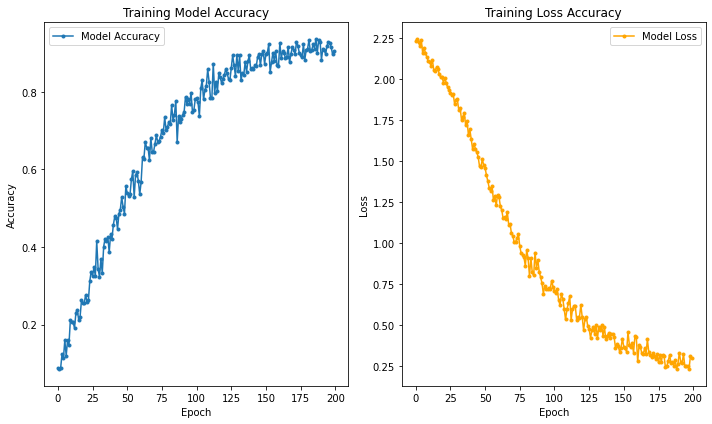

In [208]:
# Let's plot the loss over the 10 epochs
fig, axes = plt.subplots(1, 2, figsize=(10,6))

# Let's see how the accuracy fared
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], marker='.', label='Model Accuracy')
plt.title('Training Model Accuracy')
plt.legend(loc='best')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# Let's see how the Loss developed over the epochs
plt.subplot(1,2,2)
plt.plot(history.history['loss'], marker='.', label='Model Loss', color='orange')
plt.title('Training Loss Accuracy')
plt.legend(loc='best')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.tight_layout()

# The End